# **1. Perkenalan Dataset**


**Sumber Dataset**:  
Dataset diperoleh dari *kaggle* dengan link : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

Dataset: Bank Transaction Dataset for Fraud Detection

Dataset ini memuat perilaku transaksi dan pola aktivitas keuangan. Dataset ini berisi 2.512 sampel data transaksi, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan.

# **2. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [2]:
file_path = "Dataset_clustering.csv"
df_original = pd.read_csv(file_path)

# **4. Exploratory Data Analysis (EDA)**

## 4.1. Memahami Struktur Data

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Key Features:

- TransactionID: Unique alphanumeric identifier for each transaction.
- AccountID: Unique identifier for each account, with multiple transactions per account.
- TransactionAmount: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
- TransactionDate: Timestamp of each transaction, capturing date and time.
- TransactionType: Categorical field indicating 'Credit' or 'Debit' transactions.
- Location: Geographic location of the transaction, represented by U.S. city names.
- DeviceID: Alphanumeric identifier for devices used to perform the transaction.
- IP Address: IPv4 address associated with the transaction, with occasional changes for some accounts.
-MerchantID: Unique identifier for merchants, showing preferred and outlier merchants for each account.
- AccountBalance: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
- PreviousTransactionDate: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.
- Channel: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
- CustomerAge: Age of the account holder, with logical groupings based on occupation.
- CustomerOccupation: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
- TransactionDuration: Duration of the transaction in seconds, varying by transaction type.
- LoginAttempts: Number of login attempts before the transaction, with higher values indicating potential anomalies.

In [4]:
df_original.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## 4.2. Menangani Data yang Hilang

In [5]:
print("Missing values in dataset:")
print(df_original.isnull().sum())

Missing values in dataset:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


**Hasil Output**

 Pada dataset ini tidak ditemukan missing value

In [6]:
df_original.shape

(2512, 16)

## 4.3. Analisis Distribusi dan Korelasi

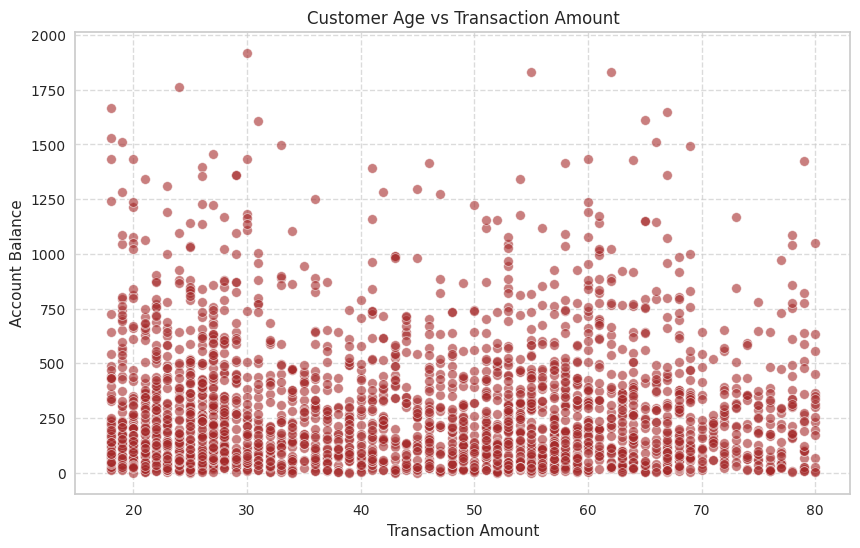

In [7]:
# Customer Age vs Transaction Amount

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_original['CustomerAge'], y=df_original['TransactionAmount'], color='brown', alpha=0.6)

plt.title('Customer Age vs Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


**Hasil Output**
- Sebagian besar transaksi terjadi pada rentang saldo dibawah 250
- Jumlah transaksi tersebar di berbagai umur
- Tidak menunjukkan suatu tren yang kuat

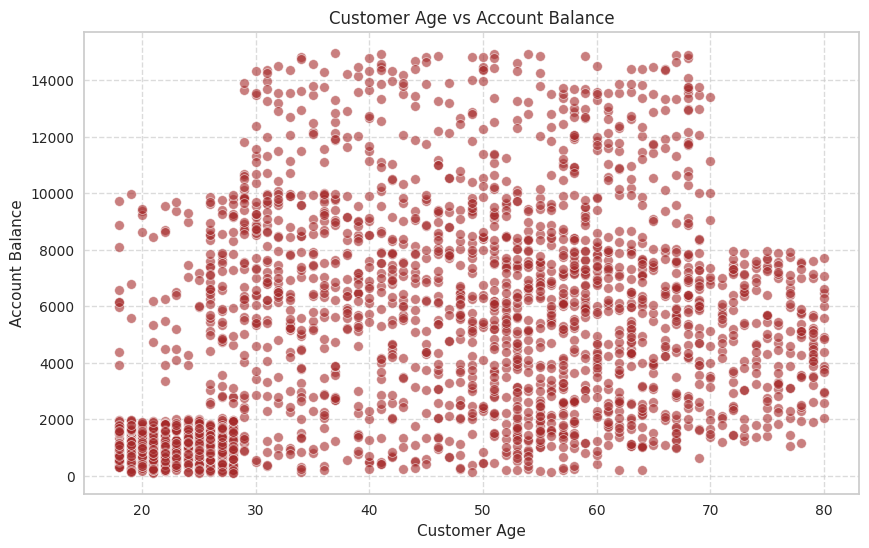

In [8]:
# Customer Age vs Account Balance

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_original['CustomerAge'], y=df_original['AccountBalance'], color='brown', alpha=0.6)

plt.title('Customer Age vs Account Balance')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Hasil Output**
- Variasi saldo akun yang signifikan di berbagai kelompok umur
- Saldo akun sepertinya lebih tinggi untuk pelanggan yang lebih tua
- Terdapat kluster pelanggan muda dengan saldo rendah

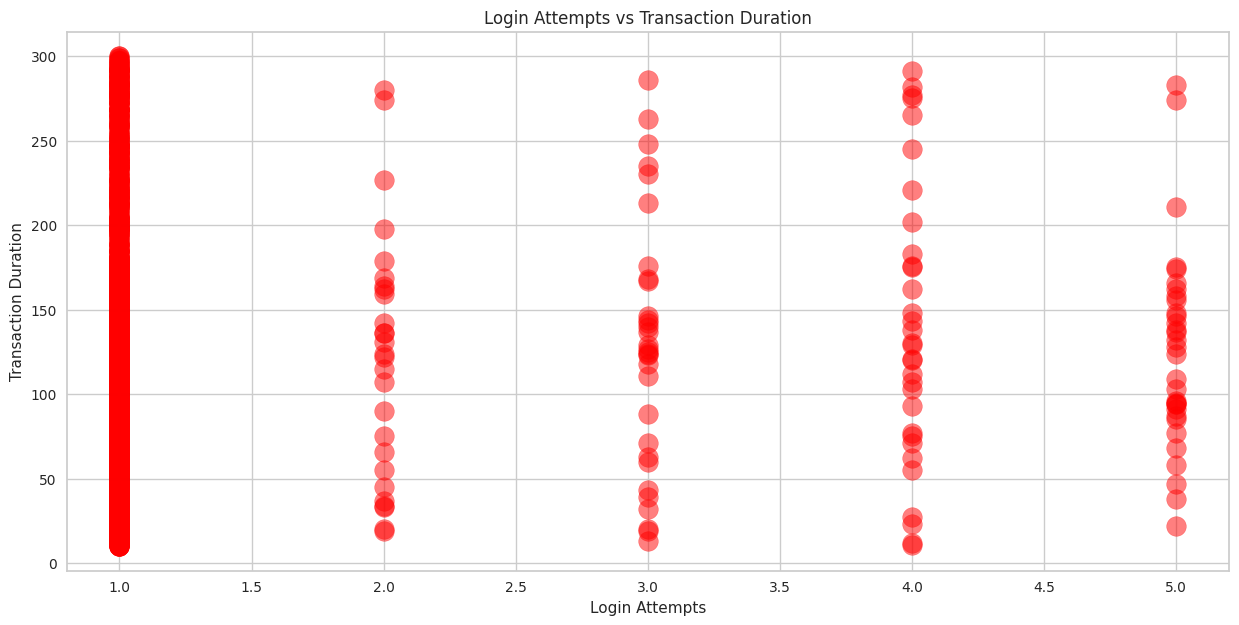

In [9]:
# Login Attempts vs Transaction Duration
plt.figure(figsize=(15, 7))
plt.scatter(df_original['LoginAttempts'], df_original['TransactionDuration'], s=200, alpha=0.5, color='red')
plt.xlabel('Login Attempts')
plt.ylabel('Transaction Duration')
plt.title('Login Attempts vs Transaction Duration')
plt.show()

**Hasil Output**
- Mayoritas pengguna melakukan satu kali percobaan login, terlihat dari banyaknya titik di nilai 1.
- Seiring bertambahnya jumlah percobaan login, durasi transaksi bervariasi
- Tidak ada hubungan yang jelas antara jumlah percobaan login dengan durasi transaksi.

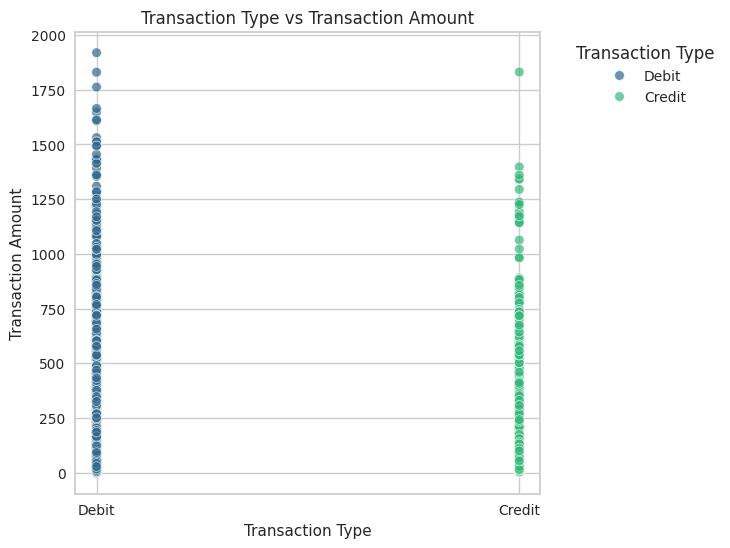

In [10]:
# Transaction Type vs Transaction Amount
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df_original['TransactionType'], y=df_original['TransactionAmount'], hue=df_original['TransactionType'], palette='viridis', alpha=0.7)

plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Type vs Transaction Amount')
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Hasil Output**
- Debit dan kredit memiliki pola distribusi transaksi yang berbeda.
- Transaksi kredit sepertinya memiliki nilai transaksi yang lebih tinggi dibandingkan debit.
- Transaksi debit lebih terkonsentrasi pada jumlah yang lebih kecil.

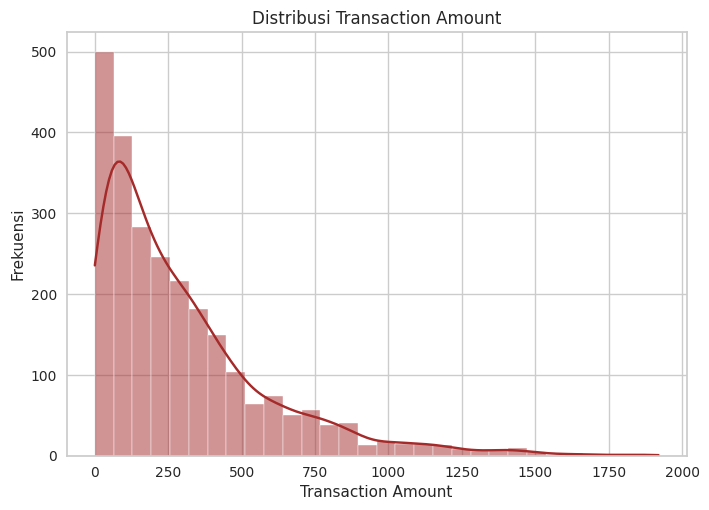

In [11]:
sns.histplot(df_original['TransactionAmount'], bins=30, kde=True, color='brown')
plt.title(f'Distribusi Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frekuensi')
plt.grid(True)

**Hasil Output**
- Distribusi jumlah transaksi memiliki pola yang menurun eksponensial.
- Mayoritas transaksi berada pada nilai kecil (di bawah 500).
- Hanya sedikit transaksi yang memiliki jumlah besar (di atas 1000).

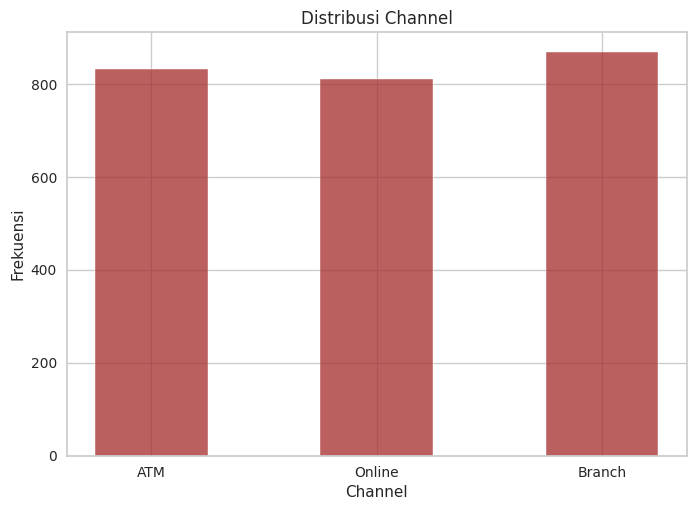

In [12]:
sns.histplot(df_original['Channel'], bins=25, color='brown', shrink=0.5)
plt.title(f'Distribusi Channel')
plt.xlabel('Channel')
plt.ylabel('Frekuensi')
plt.grid(True)

**Hasil Output**
- Penggunaan layanan melalui ATM, Online, dan Branch (cabang) relatif seimbang dalam hal frekuensi transaksi.
- Tidak ada perbedaan mencolok antara preferensi channel yang digunakan oleh pelanggan.

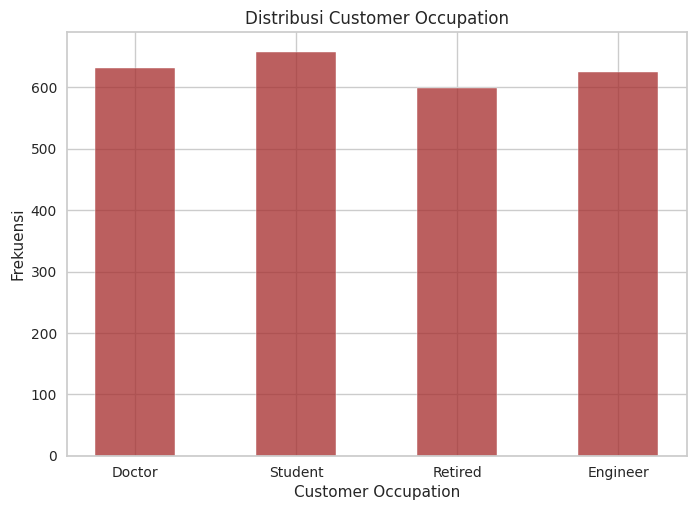

In [13]:
sns.histplot(df_original['CustomerOccupation'], bins=25, color='brown', shrink=0.5)
plt.title(f'Distribusi Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Frekuensi')
plt.grid(True)

**Hasil Output**
- Pelanggan berasal dari berbagai profesi dengan distribusi yang cukup merata di antara Doctor, Student, Retired, dan Engineer.
- Profesi Student memiliki sedikit lebih banyak pelanggan dibandingkan yang lain.

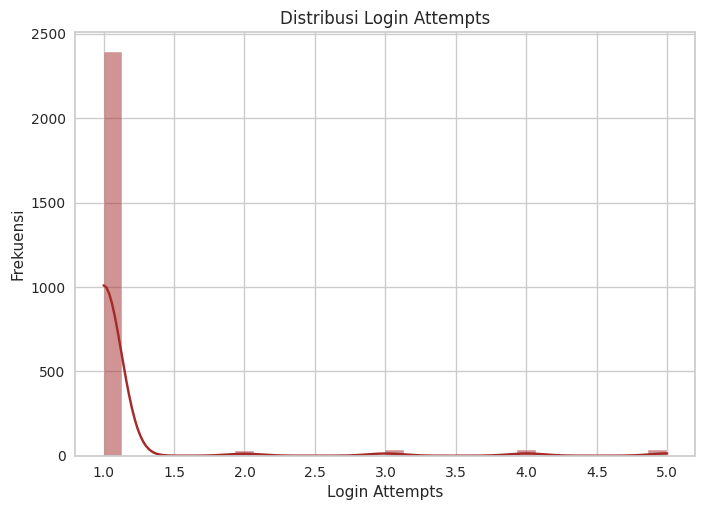

In [14]:
sns.histplot(df_original['LoginAttempts'], bins=30, kde=True, color='brown')
plt.title(f'Distribusi Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Frekuensi')
plt.grid(True)

**Hasil Output**
- Mayoritas pelanggan hanya melakukan 1 kali percobaan login.
- Jumlah pelanggan yang melakukan lebih dari satu percobaan login sangat sedikit, menunjukkan bahwa login gagal jarang terjadi.

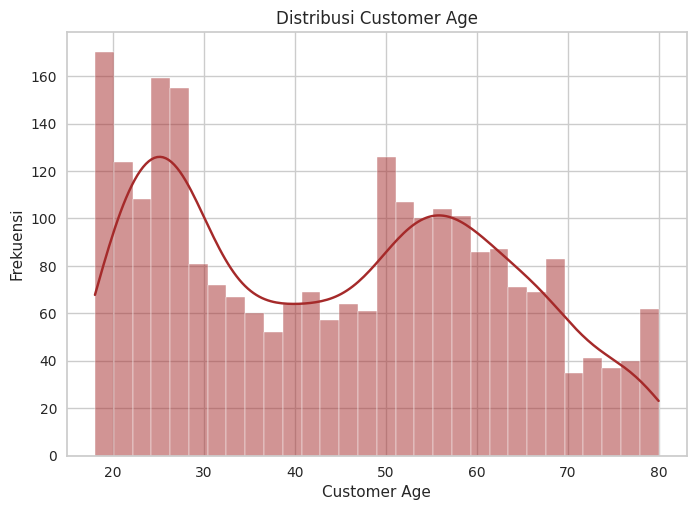

In [15]:
sns.histplot(df_original['CustomerAge'], bins=30, kde=True, color='brown')
plt.title(f'Distribusi Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frekuensi')
plt.grid(True)

**Hasil Output**
- Terdapat dua puncak dalam distribusi usia pelanggan, yaitu di sekitar usia 25 dan 50 tahun.
- Sebagian besar pelanggan berusia antara 20 hingga 60 tahun, dengan sedikit penurunan jumlah pelanggan di usia pertengahan.

<ipython-input-16-2d5d29c92af4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_locations.values, y=top_15_locations.index, palette="viridis")


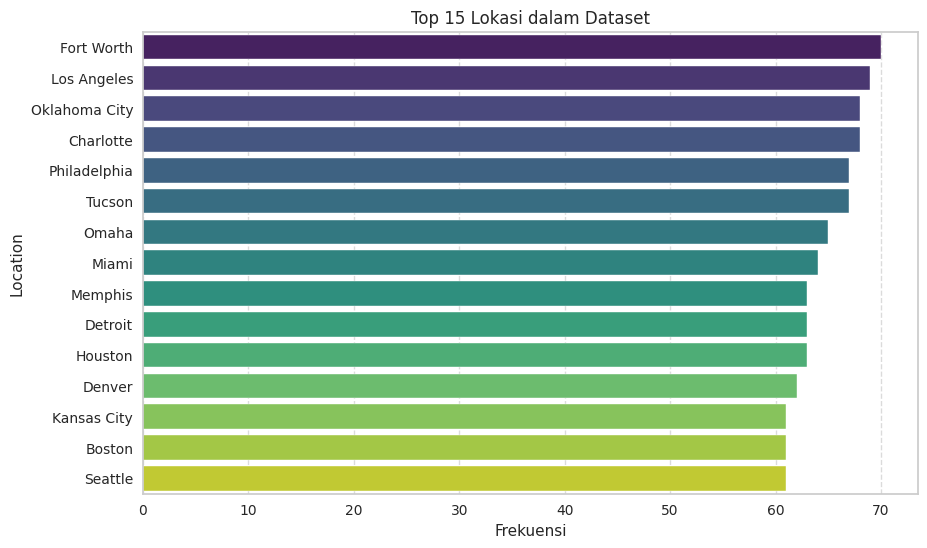

In [16]:
# Ambil 15 Lokasi dengan jumlah terbanyak
top_15_locations = df_original['Location'].value_counts().nlargest(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_locations.values, y=top_15_locations.index, palette="viridis")

plt.title('Top 15 Lokasi dalam Dataset')
plt.xlabel('Frekuensi')
plt.ylabel('Location')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


**Hasil Output**
- Fort Worth memiliki jumlah pelanggan tertinggi dalam dataset.
- Kota-kota besar seperti Los Angeles, Oklahoma City, dan Philadelphia juga memiliki banyak pelanggan.
- Distribusi pelanggan cukup merata di berbagai kota besar, tanpa satu kota yang terlalu mendominasi.

## 4.4. Visualisasi Data

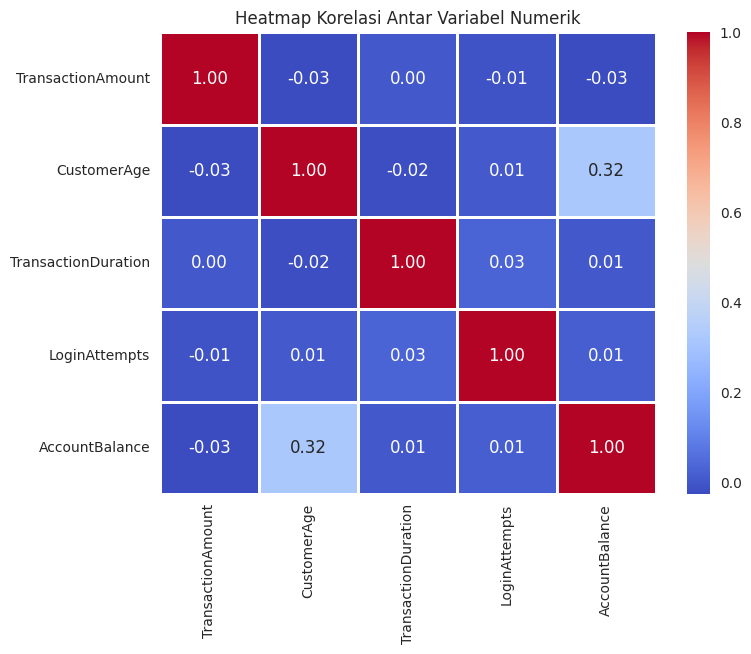

In [17]:
# Heatmap Korelasi
numerical_columns = df_original.select_dtypes(include=['number']).columns

plt.figure(figsize=(8, 6))
sns.heatmap(df_original[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

**Hasil Output**
- Sebagian besar hubungan antar variabel memiliki korelasi yang sangat rendah
- Hanya variabel CustomerAge dan AccountBalance yang memiliki korelasi positif cukup signifikan (0.32)
- Kesimpulannya, dataset ini menunjukkan bahwa variabel-variabel numeriknya memiliki hubungan yang lemah satu sama lain, kecuali sedikit hubungan antara CustomerAge dan AccountBalance.

# **5. Data Preprocessing**

## 5.1. Menghapus atau Menangani Data Kosong (Missing Values)

In [18]:
print("Missing values in dataset:")
print(df_original.isnull().sum())

Missing values in dataset:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


**Hasil Output**

Dataset ini tidak memiliki missing value

## 5.2. Menghapus Data Duplikat

In [19]:
print("Duplicated values in dataset:")
print(df_original.duplicated().sum())

Duplicated values in dataset:
0


**Hasil Output**

Dataset ini tidak memiliki duplicated value

**Karena tidak ada missing dan duplicated value, Kita bisa langsung ke tahap selanjutnya"**

## 5.3. Normalisasi atau Standarisasi Fitur

### 5.3.1. Normalisasi

In [20]:
df_clean = df_original.copy()
print(df_clean['TransactionDate'].dtypes)

df_clean['TransactionDate'].head()

object


,TransactionDate
0,2023-04-11 16:29:14
1,2023-06-27 16:44:19
2,2023-07-10 18:16:08
3,2023-05-05 16:32:11
4,2023-10-16 17:51:24


In [21]:
df_clean['TransactionDate'] = pd.to_datetime(df_clean["TransactionDate"])
df_clean['PreviousTransactionDate'] = pd.to_datetime(df_clean["PreviousTransactionDate"])

df_clean["Year"] = df_clean["TransactionDate"].dt.year
df_clean["Month"] = df_clean["TransactionDate"].dt.month
df_clean["Day"] = df_clean["TransactionDate"].dt.day
df_clean["Hour"] = df_clean["TransactionDate"].dt.hour
df_clean["Minute"] = df_clean["TransactionDate"].dt.minute
df_clean["Second"] = df_clean["TransactionDate"].dt.second

# Normalisasi skala 0-1
df_clean["TransactionDate_Normal_Month"] = df_clean["Month"] / 12
df_clean["TransactionDate_Normal_Day"] = df_clean["Day"] / 31
df_clean["TransactionDate_Normal_Hour"] = df_clean["Hour"] / 24
df_clean["TransactionDate_Normal_Minute"] = df_clean["Minute"] / 60
df_clean["TransactionDate_Normal_Second"] = df_clean["Second"] / 60

# Menghitung selisih waktu transaksi sebelumnya
df_clean["TimeDiff_Days"] = (df_clean['TransactionDate'] - df_clean['PreviousTransactionDate']).dt.days.abs()
df_clean["TimeDiff_Seconds"] = (df_clean["TransactionDate"] - df_clean["PreviousTransactionDate"]).dt.total_seconds()

print(df_clean)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
0         TX000001   AC00128              14.09 2023-04-11 16:29:14   
1         TX000002   AC00455             376.24 2023-06-27 16:44:19   
2         TX000003   AC00019             126.29 2023-07-10 18:16:08   
3         TX000004   AC00070             184.50 2023-05-05 16:32:11   
4         TX000005   AC00411              13.45 2023-10-16 17:51:24   
...            ...       ...                ...                 ...   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54 2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63 2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97 2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92      

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   TransactionID                  2512 non-null   object        
 1   AccountID                      2512 non-null   object        
 2   TransactionAmount              2512 non-null   float64       
 3   TransactionDate                2512 non-null   datetime64[ns]
 4   TransactionType                2512 non-null   object        
 5   Location                       2512 non-null   object        
 6   DeviceID                       2512 non-null   object        
 7   IP Address                     2512 non-null   object        
 8   MerchantID                     2512 non-null   object        
 9   Channel                        2512 non-null   object        
 10  CustomerAge                    2512 non-null   int64         
 11  CustomerOccupatio

## 5.4. Deteksi dan Penanganan Outlier

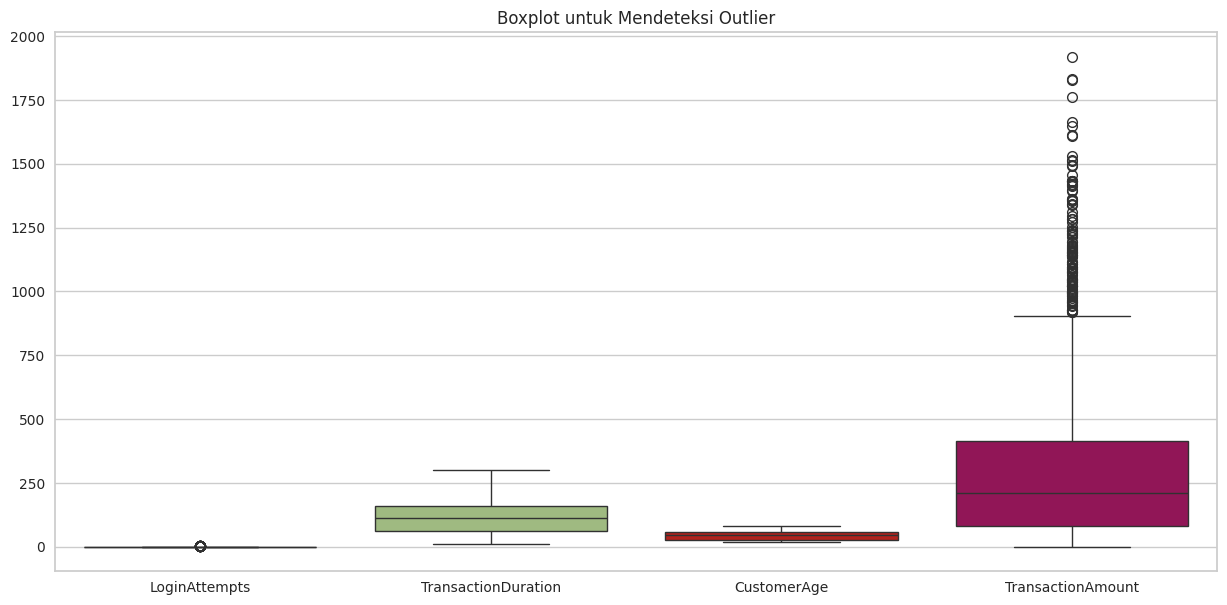

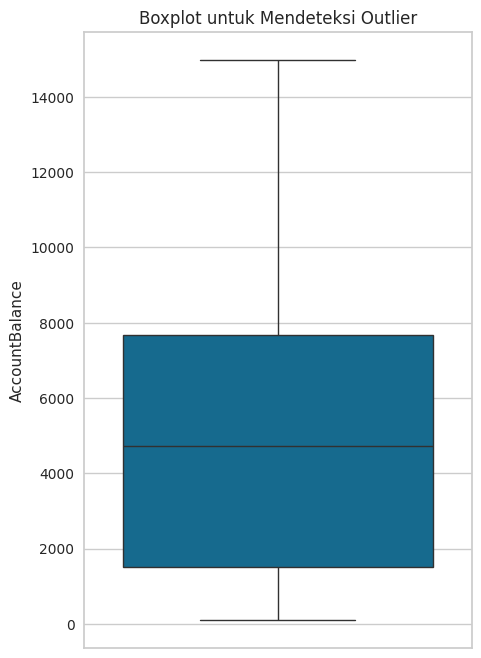

In [23]:
kolom_numerik = ['LoginAttempts', 'TransactionDuration', 'CustomerAge', 'TransactionAmount']

# Plot boxplot untuk setiap fitur numerik
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_clean[kolom_numerik])
#plt.xticks(rotation=45)
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

# Plot boxplot untuk setiap fitur numerik
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_clean['AccountBalance'])
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   TransactionID                  2512 non-null   object        
 1   AccountID                      2512 non-null   object        
 2   TransactionAmount              2512 non-null   float64       
 3   TransactionDate                2512 non-null   datetime64[ns]
 4   TransactionType                2512 non-null   object        
 5   Location                       2512 non-null   object        
 6   DeviceID                       2512 non-null   object        
 7   IP Address                     2512 non-null   object        
 8   MerchantID                     2512 non-null   object        
 9   Channel                        2512 non-null   object        
 10  CustomerAge                    2512 non-null   int64         
 11  CustomerOccupatio

## 5.5 Encoding

In [25]:
# Encoding

# Membuat duplikat df_original
df_encoded = pd.get_dummies(df_clean, columns=['CustomerOccupation'], prefix='CustomerOccupation', drop_first=True)

label_encoder = LabelEncoder()
df_encoded['TransactionType'] = label_encoder.fit_transform(df_clean['TransactionType'])

df_encoded.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDate_Normal_Month,TransactionDate_Normal_Day,TransactionDate_Normal_Hour,TransactionDate_Normal_Minute,TransactionDate_Normal_Second,TimeDiff_Days,TimeDiff_Seconds,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,San Diego,D000380,162.198.218.92,M015,ATM,...,0.333333,0.354839,0.666667,0.483333,0.233333,573,-49477134.0,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,Houston,D000051,13.149.61.4,M052,ATM,...,0.500000,0.870968,0.666667,0.733333,0.316667,496,-42823516.0,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,Mesa,D000235,215.97.143.157,M009,Online,...,0.583333,0.322581,0.750000,0.266667,0.133333,483,-41694656.0,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,Raleigh,D000187,200.13.225.150,M002,Online,...,0.416667,0.161290,0.666667,0.533333,0.183333,549,-47403415.0,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,Atlanta,D000308,65.164.3.100,M091,Online,...,0.833333,0.516129,0.708333,0.850000,0.400000,385,-33228915.0,False,False,True


## 5.6. Standarisasi

In [26]:
df_numeric = df_encoded.select_dtypes(include=["int64", "float64", "bool"]).copy()

# Standardisasi hanya pada kolom numerik
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Menampilkan hasil
print(df_standardized)

      TransactionAmount  TransactionType  CustomerAge  TransactionDuration  \
0             -0.971275         0.540538     1.423718            -0.552443   
1              0.269440         0.540538     1.311287             0.305314   
2             -0.586882         0.540538    -1.443277            -0.909842   
3             -0.387456         0.540538    -1.049768            -1.353017   
4             -0.973468        -1.850010    -1.049768             1.120184   
...                 ...              ...          ...                  ...   
2507           1.913802        -1.850010    -0.656259            -0.152156   
2508          -0.157779         0.540538     0.186975             0.819969   
2509          -0.921462         0.540538     0.636700             0.376794   
2510          -0.382420         0.540538    -1.218415            -1.438793   
2511          -0.186763        -1.850010    -1.162199            -0.380892   

      LoginAttempts  AccountBalance  TransactionDate_Normal_Mon

In [27]:
df_standardized.columns

Index(['TransactionAmount', 'TransactionType', 'CustomerAge',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'TransactionDate_Normal_Month', 'TransactionDate_Normal_Day',
       'TransactionDate_Normal_Hour', 'TransactionDate_Normal_Minute',
       'TransactionDate_Normal_Second', 'TimeDiff_Days', 'TimeDiff_Seconds',
       'CustomerOccupation_Engineer', 'CustomerOccupation_Retired',
       'CustomerOccupation_Student'],
      dtype='object')

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [28]:
# Mencari nilai k yang optimal

def auto_tune_kmeans(X, max_clusters=10):
    best_k = 2
    best_score = -1
    silhouette_scores = []
    k_values = []
    inertia = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)

        silhouette_scores.append(score)
        k_values.append(k)
        inertia.append(kmeans.inertia_)

        print(f"K: {k}, Silhouette Score: {score:.4f}, Inertia: {kmeans.inertia_:.2f}")

        if score > best_score:
            best_k = k
            best_score = score

    return best_k, k_values, silhouette_scores, inertia

# Menjalankan fungsi
best_k, k_values, silhouette_scores, inertia = auto_tune_kmeans(df_standardized, max_clusters=10)

K: 2, Silhouette Score: 0.1330, Inertia: 34551.78
K: 3, Silhouette Score: 0.1466, Inertia: 30903.39
K: 4, Silhouette Score: 0.1476, Inertia: 28702.83
K: 5, Silhouette Score: 0.1493, Inertia: 26909.77
K: 6, Silhouette Score: 0.1303, Inertia: 25902.27
K: 7, Silhouette Score: 0.1404, Inertia: 24279.85
K: 8, Silhouette Score: 0.1434, Inertia: 23244.99
K: 9, Silhouette Score: 0.1455, Inertia: 22291.86
K: 10, Silhouette Score: 0.1450, Inertia: 21792.87


## **b. Evaluasi Model Clustering**

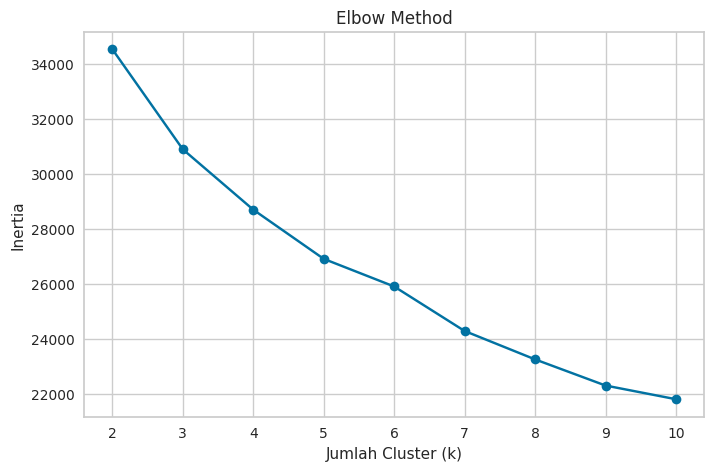

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

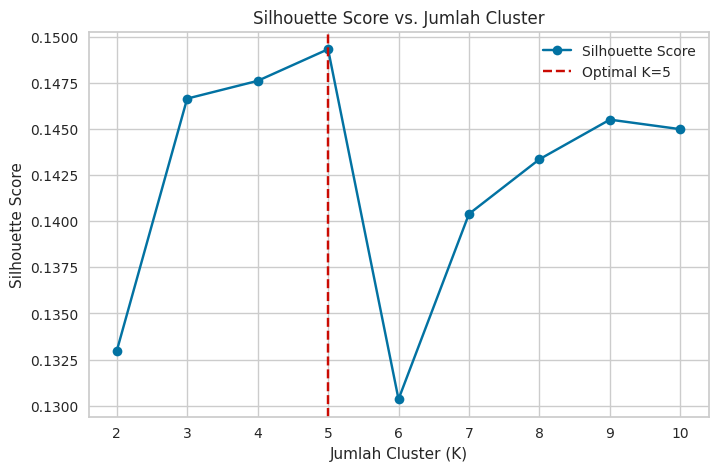

In [30]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Optimal K={best_k}')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Jumlah Cluster')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Model

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_standardized['Cluster'] = kmeans.fit_predict(df_standardized)

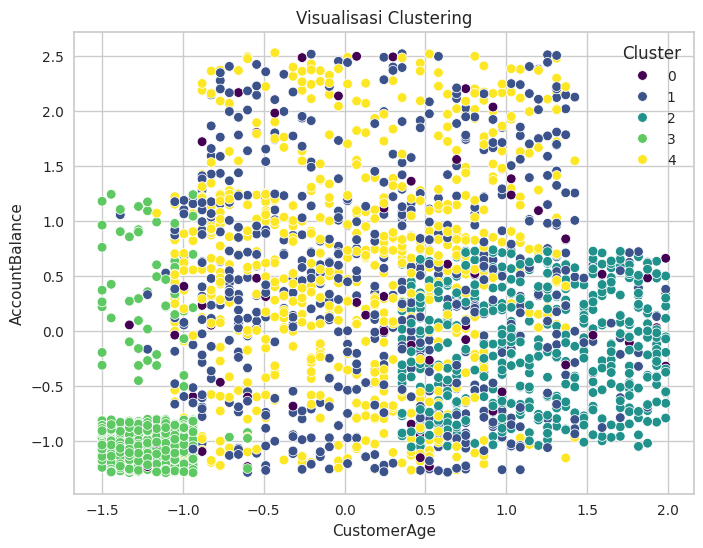

Cluster
1    669
4    658
3    636
2    466
0     83
Name: count, dtype: int64


In [32]:
# Visualisasi

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_standardized['CustomerAge'], y=df_standardized['AccountBalance'], hue=df_standardized['Cluster'], palette='viridis')
plt.xlabel('CustomerAge')
plt.ylabel('AccountBalance')
plt.title('Visualisasi Clustering')
plt.show()

print(df_standardized['Cluster'].value_counts())

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [33]:
# Manual Fitur Selection
features = ['TransactionType','CustomerAge', 'AccountBalance',
            'CustomerOccupation_Engineer', 'CustomerOccupation_Retired', 'CustomerOccupation_Student', 'TransactionType', 'TimeDiff_Days']


# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_standardized[features])

# Konversi kembali ke DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [34]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

In [35]:
# Mencari nilai k yang optimal
def auto_tune_kmeans(X, max_clusters=10, tol=0.01):
    best_k = 2
    best_score = -1
    prev_score = -1
    silhouette_scores = []
    k_values = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)

        silhouette_scores.append(score)
        k_values.append(k)

        print(f"K: {k}, Silhouette Score: {score:.4f}")

        # Simpan K terbaik
        if score > best_score:
            best_k = k
            best_score = score


        prev_score = score

    # Pastikan mengembalikan daftar lengkap K dan skor meskipun berhenti lebih awal
    return best_k, k_values, silhouette_scores

# Menjalankan fungsi
best_k, k_values, silhouette_scores = auto_tune_kmeans(df_pca, max_clusters=10, tol=0.01)

K: 2, Silhouette Score: 0.5718
K: 3, Silhouette Score: 0.6877
K: 4, Silhouette Score: 0.7332
K: 5, Silhouette Score: 0.7071
K: 6, Silhouette Score: 0.6940
K: 7, Silhouette Score: 0.6543
K: 8, Silhouette Score: 0.6261
K: 9, Silhouette Score: 0.6181
K: 10, Silhouette Score: 0.6166


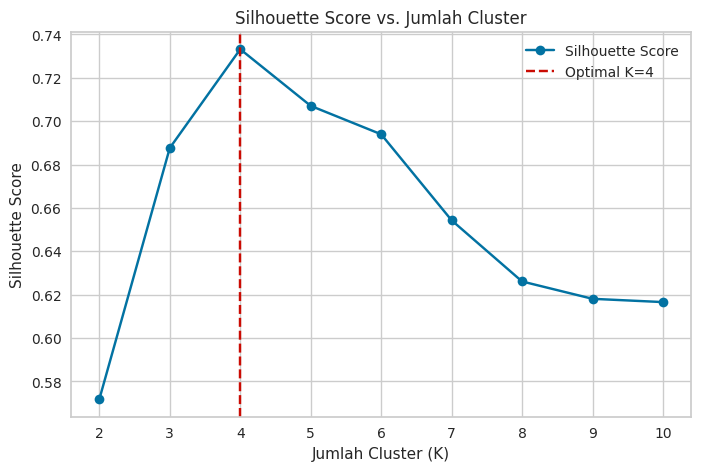

In [36]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Optimal K={best_k}')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Jumlah Cluster')
plt.legend()
plt.grid(True)
plt.show()

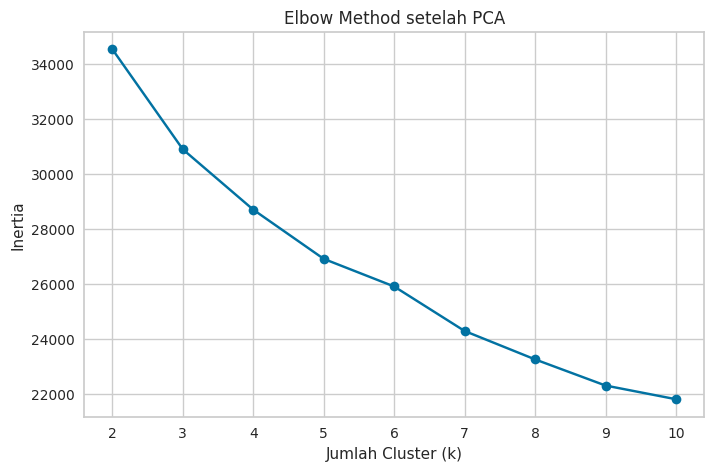

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method setelah PCA')
plt.show()

In [38]:
# Model Final

kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans_final.fit_predict(df_pca[['PC1', 'PC2']])

## **d. Visualisasi Hasil Clustering**

Setelah melatih model clustering dan mencari jumlah cluster optimal, langkah selanjutnya yaitu menampilkan hasil clustering melalui visualisasi.

Berikut adalah rekomendasi tahapannya.

Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

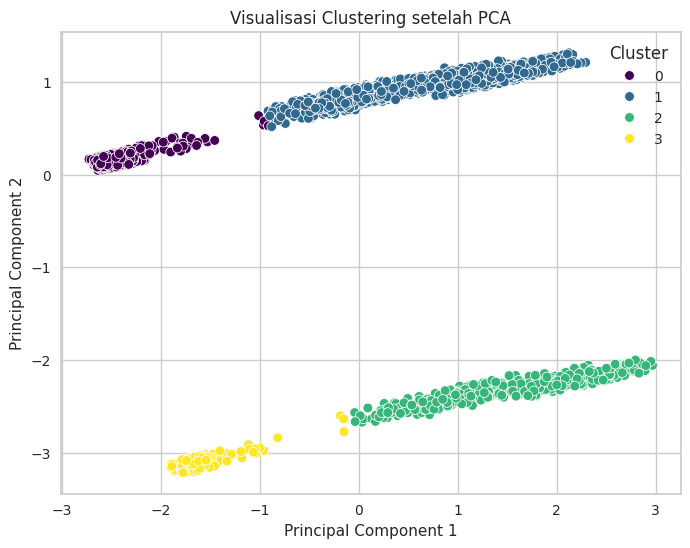

Silhouette Score untuk K=4: 0.7332
Cluster
1    1420
0     524
2     426
3     142
Name: count, dtype: int64


In [39]:
if isinstance(df_pca, np.ndarray):
    df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Clustering setelah PCA')
plt.legend(title='Cluster')
plt.show()

# Hitung Silhouette Score pada data PCA tanpa kolom 'Cluster'
silhouette_avg = silhouette_score(df_pca.drop(columns=['Cluster']), df_pca['Cluster'])
print(f"Silhouette Score untuk K={best_k}: {silhouette_avg:.4f}")

# Tampilkan jumlah anggota dalam setiap cluster
print(df_pca['Cluster'].value_counts())

In [45]:
df_silhouette = pd.DataFrame({
    'K': best_k,
    'Silhouette Score': silhouette_scores
})

best_k = df_silhouette.loc[df_silhouette['Silhouette Score'].idxmax(), 'K']
best_score = df_silhouette['Silhouette Score'].max()

df_best = pd.DataFrame({'Nilai K': [best_k], 'Best Silhouette Score': [best_score]})
display(df_best)

,Nilai K,Best Silhouette Score
0,4,0.733177


- Nilai silhoette Score terbaik sebelum melakuakan PCA adalah **0.1283**
- Nilai silhoette Score terbaik setelah melakuakan PCA adalah **0.7332**

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

#### Invers

In [46]:
# Pastikan hanya kolom numerik yang dipakai
df_numeric = df_encoded.select_dtypes(include=["int64", "float64", "bool"]).copy()

# Fit scaler ke df_numeric
scaler = StandardScaler()
df_standardized_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [47]:
df_inverse = pd.DataFrame(
    scaler.inverse_transform(df_standardized_numeric),
    columns=df_numeric.columns
)

In [48]:
# Inversi encoding untuk 'TransactionType'
df_inverse['TransactionType'] = label_encoder.inverse_transform(df_inverse['TransactionType'].round().astype(int))

In [49]:
# Ambil kolom hasil encoding
category_columns = ['CustomerOccupation_Engineer', 'CustomerOccupation_Retired',
                    'CustomerOccupation_Student']

# Gunakan idxmax untuk mengembalikan ke kategori awal
df_encoded['CustomerOccupation'] = df_encoded[category_columns].idxmax(axis=1).str.replace('CustomerOccupation_', '')
df_encoded.drop(columns=category_columns, inplace=True)

In [50]:
# Ambil kolom yang belum ada di df_final
missing_cols = [col for col in df_original.columns if col not in df_encoded.columns]

# Gabungkan kolom-kolom tersebut dari df_original
df_final = pd.concat([
    df_original[missing_cols].reset_index(drop=True),
    df_encoded.reset_index(drop=True)
], axis=1)

# Susun ulang kolom agar sesuai df_original
df_final = df_final[df_original.columns]

# Cek hasil akhir
print(df_final.head())

  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0                1  San Diego  D000380  162.198.218.92       M015     ATM   
1                1    Houston  D000051     13.149.61.4       M052     ATM   
2                1       Mesa  D000235  215.97.143.157       M009  Online   
3                1    Raleigh  D000187  200.13.225.150       M002  Online   
4                0    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70           Engineer                   81 

In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   int64         
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [52]:
df_final['Cluster'] = kmeans_final.labels_

In [53]:
df_final.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,San Diego,D000380,162.198.218.92,M015,ATM,70,Engineer,81,1,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,Houston,D000051,13.149.61.4,M052,ATM,68,Engineer,141,1,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,3


#### agregasi

In [54]:
# Mean

df_numeric = df_final.select_dtypes(include=['number'])
df_grouped = df_numeric.groupby(df_final['Cluster']).mean()
display(df_grouped)

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
Cluster,,,,,,,
0,306.265095,1.0,23.053435,118.931298,1.112595,1557.662634,0.0
1,290.831049,1.0,52.060563,120.005634,1.121127,6372.741408,1.0
2,297.564930,0.0,53.720657,117.190141,1.164319,6474.322042,2.0
3,333.309225,0.0,23.450704,126.007042,1.084507,1574.365070,3.0


In [55]:
# Max

df_numeric = df_final.select_dtypes(include=['number'])
df_grouped = df_numeric.groupby(df_final['Cluster']).max()
display(df_grouped)

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
Cluster,,,,,,,
0,1762.28,1,29,299,5,9963.39,0
1,1919.11,1,80,300,5,14977.99,1
2,1831.02,0,80,293,5,14935.50,2
3,1397.59,0,30,294,5,9700.90,3


In [56]:
# Min

df_numeric = df_final.select_dtypes(include=['number'])
df_grouped = df_numeric.groupby(df_final['Cluster']).min()
display(df_grouped)

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
Cluster,,,,,,,
0,0.26,1,18,11,1,101.25,0
1,0.32,1,26,10,1,112.76,1
2,2.03,0,26,10,1,184.72,2
3,4.58,0,18,12,1,105.01,3


In [57]:
# Median

df_numeric = df_final.select_dtypes(include=['number'])
df_numeric['Cluster'] = df_final['Cluster']
df_grouped = df_numeric.groupby('Cluster').agg('median')
display(df_grouped)

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,,
0,202.225,1.0,23.0,113.0,1.0,1065.255
1,206.355,1.0,53.0,114.0,1.0,6217.175
2,216.280,0.0,54.0,109.0,1.0,6301.760
3,275.555,0.0,24.0,117.0,1.0,1127.070


In [58]:
# Standar Deviasi

df_numeric = df_final.select_dtypes(include=['number'])
df_numeric['Cluster'] = df_final['Cluster']
df_grouped = df_numeric.groupby('Cluster').agg('std')

display(df_grouped)

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,,
0,309.453606,0.0,3.190720,72.217294,0.557166,1904.311895
1,286.029671,0.0,14.237658,69.898547,0.595476,3590.349475
2,290.963759,0.0,13.661776,68.146444,0.700416,3781.528418
3,286.545223,0.0,3.091002,67.799297,0.512164,1883.644263


In [59]:
# Quartil 1

df_numeric = df_final.select_dtypes(include=['number'])
df_numeric['Cluster'] = df_final['Cluster']
df_grouped = df_numeric.groupby('Cluster').agg(lambda x: x.quantile(0.25))

display(df_grouped)

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,,
0,81.4200,1.0,20.0,59.75,1.0,616.5025
1,83.4825,1.0,40.0,63.00,1.0,3503.4600
2,77.9550,0.0,43.0,61.00,1.0,3286.4650
3,95.6150,0.0,21.0,71.00,1.0,459.9850


In [60]:
# Quartil 3

df_numeric = df_final.select_dtypes(include=['number'])
df_numeric['Cluster'] = df_final['Cluster']
df_grouped = df_numeric.groupby('Cluster').agg(lambda x: x.quantile(0.75))

display(df_grouped)

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,,
0,424.8300,1.0,26.0,161.25,1.0,1597.5950
1,401.7800,1.0,63.0,162.00,1.0,8544.2250
2,421.9625,0.0,63.0,159.75,1.0,8657.7825
3,473.5350,0.0,26.0,158.75,1.0,1662.1050


In [61]:
# Menghitung jumlah TransactionType per Cluster
transaction_type_per_cluster = df_final.groupby('Cluster')['TransactionType'].value_counts(normalize=True).unstack()
transaction_type_per_cluster_percent = transaction_type_per_cluster * 100
transaction_type_per_cluster_percent = transaction_type_per_cluster_percent.fillna(0)

transaction_type_df = transaction_type_per_cluster_percent.round(2)
print("Persentase TransactionType per Cluster (%):")
display(transaction_type_df)

Persentase TransactionType per Cluster (%):


TransactionType,0,1
Cluster,,
0,0.0,100.0
1,0.0,100.0
2,100.0,0.0
3,100.0,0.0


In [62]:
# Menghitung jumlah Pekerjaan pelanggan per Cluster
Occupation_type_per_cluster = df_final.groupby('Cluster')['CustomerOccupation'].value_counts(normalize=True).unstack()
Occupation_type_per_cluster_percent = Occupation_type_per_cluster * 100
Occupation_type_per_cluster_percent = Occupation_type_per_cluster_percent.fillna(0)

Occupation_type_df = Occupation_type_per_cluster_percent.round(2)
print("Persentase Occupation per Cluster (%):")
display(Occupation_type_df)

Persentase Occupation per Cluster (%):


CustomerOccupation,Engineer,Retired,Student
Cluster,,,
0,1.15,0.00,98.85
1,68.38,31.62,0.00
2,64.79,35.21,0.00
3,2.11,0.00,97.89


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

### Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Tipe Transaksi** : Debit
- **Usia**:
 - Rata-rata: 23 Tahun
 - Min: 18 tahun
 - max: 29 tahun
- **Transaksi**:
 - Rata-rata: 306.27
 - min: 0.26
 - max: 1,762.28
- **Saldo akun**:
 - Rata-rata: 1557.66
 - min: 101.25
 - max: 9,963.39
- **Durasi transaksi**:
 - Rata-rata: 118.93 detik
 - min: 11 detik
 - max: 299 detik
- **Pekerjaan Dominan**: Pelajar (98.85%)
- **Analisis:** Klaster ini didominasi oleh pelanggan muda (mahasiswa) dengan saldo rekening relatif kecil dan frekuensi transaksi lebih sering tetapi dengan nominal transaksi yang relatif kecil. Memiliki rata-rata saldo yang relatif kecil sekitar 1557.66.
- Cluster 0 didapatkan karena variabel Usia memiliki nilai rata-rata 23 tahun dengan batas minimum 18 tahun dan batas maksimum 29 tahun. variabel Transaksi memiliki nilai rata-rata 306.27 dengan batas minimum 0.26 dan batas maksimum 1,762.28. variabel Saldo akun memiliki nilai rata-rata 1,557.66 dengan batas minimum 101.25 dan batas maksimum 9,963.39. variabel Durasi transaksi memiliki nilai rata-rata 118.93 detik dengan batas minimum 11 detik dan batas maksimum 299 detik. variabel Pekerjaan memiliki nilai modus kategori Mahasiswa (98.85%).



## Cluster 1:
- **Tipe Transaksi** : Debit
- **Usia**:
 - Rata-rata : 52.06 tahun
 - min: 26 tahun
 - max: 80 tahun
- **Transaksi**:
 - Rata-rata : 290.83
 - min: 0.32
 - max: 1,919.11
- **Saldo akun**:  
 - Rata-rata : 6,372.74
 - min: 112.76
 - max: 14,977.99
- **Durasi transaksi**:
 - Rata-rata : 120.01 detik
 - min: 10 detik
 - max: 300 detik
- **Pekerjaan Dominan**:
  - Engineer (34.01%)
  - Pensiunan (31.62%)
- **Analisis:** Klaster ini terdiri dari pelanggan yang lebih tua dengan saldo akun yang lebih besar. Profesi mereka bervariasi, termasuk engineer dan pensiunan. Transaksi lebih stabil dibandingkan klaster lain, tetapi nominalnya tidak sebesar klaster lain yang memiliki saldo tinggi. Memiliki rata-rata saldo yang relatif besar sekitar 6,372.74.
- Cluster 1 didapatkan karena Variabel Usia memiliki nilai rata-rata 52.06 tahun dengan batas minimum 26 tahun dan batas maksimum 80 tahun. Variabel Transaksi memiliki nilai rata-rata 290.83 dengan batas minimum 0.32 dan batas maksimum 1,919.11. Variabel Saldo akun memiliki nilai rata-rata 6,372.74 dengan batas minimum 112.76 dan batas maksimum 14,977.99. Variabel Durasi transaksi memiliki nilai rata-rata 120.01 detik dengan batas minimum 10 detik dan batas maksimum 300 detik. Variabel Pekerjaan memiliki nilai modus kategori Engineer (34.01%) dan Pensiunan (31.62%).



## Cluster 2:
- **Tipe Transaksi** : Credit
- **Usia**:
 - Rata-rata : 53.72 tahun
 - min: 26 tahun
 - max: 80 tahun  
- **Transaksi**:
 - Rata-rata : 297.56
 - min: 2.03
 - max: 1,831.02
- **Saldo akun**:
 - Rata-rata : 6,474.32
 - min: 184.72
 - max: 14,935.50
- **Durasi transaksi**:
 - Rata-rata : 117.19 detik
 - min: 10 detik
 - max: 293 detik
- **Pekerjaan Dominan** :
 - Engineer (32.16%)
 - Pensiunan (35.21%)
- **Analisis:** Mirip dengan Klaster 1, tetapi memiliki saldo rata-rata yang lebih tinggi dan sedikit lebih stabil dalam jumlah transaksi. Memiliki rata-rata saldo yang relatif besar sekitar 6,474.32.
- Cluster 2 didapatkan karena Variabel Usia memiliki nilai rata-rata 53.72 tahun dengan batas minimum 26 tahun dan batas maksimum 80 tahun. Variabel Transaksi memiliki nilai rata-rata 297.56 dengan batas minimum 2.03 dan batas maksimum 1,831.02. Variabel Saldo akun memiliki nilai rata-rata 6,474.32 dengan batas minimum 184.72 dan batas maksimum 14,935.50. Variabel Durasi transaksi memiliki nilai rata-rata 117.19 detik dengan batas minimum 10 detik dan batas maksimum 293 detik. Variabel Pekerjaan memiliki nilai modus kategori Engineer (32.16%) dan Pensiunan (35.21%).



## Cluster 3:
- **Tipe Transaksi** : Credit
- **Usia**:
 - Rata-rata : 23.45 tahun
  - min: 18 tahun
  - max: 30 tahun  
- **Transaksi**:
 - Rata-rata : 333.31
 - min: 4.58
 - max: 1,397.59
- **Saldo akun**:
 - Rata-rata: 1,574.36
 - min: 105.01
 - max: 9,700.90
- **Durasi transaksi**:
 - Rata-rata : 126.00 detik
 - min: 12 detik
 - max: 294 detik
- **Pekerjaan Dominan** : Pelajar (97.88%)
- **Analisis:** Klaster ini mirip dengan Klaster 0, tetapi memiliki durasi transaksi sedikit lebih lama dan jumlah transaksi lebih tinggi. Memiliki rata-rata saldo yang besar sekitar 1,574.36.
- Cluster 3 didapatkan karena Variabel Usia memiliki nilai rata-rata 23.45 tahun dengan batas minimum 18 tahun dan batas maksimum 30 tahun. Variabel Transaksi memiliki nilai rata-rata 333.31 dengan batas minimum 4.58 dan batas maksimum 1,397.59. Variabel Saldo akun memiliki nilai rata-rata 1,574.36 dengan batas minimum 105.01 dan batas maksimum 9,700.90. Variabel Durasi transaksi memiliki nilai rata-rata 126.00 detik dengan batas minimum 12 detik dan batas maksimum 294 detik. Variabel Pekerjaan memiliki nilai modus kategori Mahasiswa (97.88%).

### Kesimpulan

kesimpulan cluster dari fitur input yang digunakan : pekerjaan, tipe transaksi, umur, saldo, dan perbedaan tanggal transaksi terakhir

### Cluster 0 : <br>
  Terdiri dari **pelanggan muda** yang menggunakan transaksi **Debit**, dengan **saldo rata-rata yang rendah**, mayoritas pekerjaan dari pelanggan ini adalah **Pelajar** <br>
### Cluster 1 : <br>
  Terdiri dari **pelanggan senior** yang menggunakan transaksi **Debit**, dengan **saldo rata-rata yang besar**, mayoritas pekerjaan dari pelanggan ini adalah **engineer dan pensiunan** <br>
### Cluster 2 : <br>
  Terdiri dari **pelanggan senior** yang menggunakan transaksi **Kredit**, dengan **saldo rata-rata yang besar**, mayoritas pekerjaan dari pelanggan ini adalah **engineer dan pensiunan** <br>
### Cluster 3 : <br>
  Terdiri dari **pelanggan muda** yang menggunakan transaksi **Kredit**, dengan **saldo rata-rata yang kecil**, mayoritas pekerjaan dari pelanggan ini adalah **Pelajar** <br>

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
df_final.to_csv("Dataset_inisiasi.csv", index=False)

In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   int64         
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-